In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('plate_3860.csv')
print(df.shape)
print(df.columns)
df.head()

(2121, 10)
Index(['Unnamed: 0', ' sample_no', ' plate_id', ' Eta.V_ave', ' Sn.PM.Loading',
       ' Fe.PM.Loading', ' Co.PM.Loading', ' Ta.PM.Loading', ' Mn.PM.Loading',
       ' Cu.PM.Loading'],
      dtype='object')


,Unnamed: 0,sample_no,plate_id,Eta.V_ave,Sn.PM.Loading,Fe.PM.Loading,Co.PM.Loading,Ta.PM.Loading,Mn.PM.Loading,Cu.PM.Loading
0,0,2,3860,0.408761,0.1,0.2,0.6,0.1,0.0,0.0
1,1,3,3860,0.416087,0.0,0.3,0.5,0.0,0.2,0.0
2,2,4,3860,0.461742,0.2,0.0,0.4,0.3,0.0,0.1
3,3,5,3860,0.475109,0.1,0.0,0.4,0.0,0.1,0.4
4,4,6,3860,0.594522,0.2,0.1,0.0,0.5,0.0,0.2


In [4]:
feature_names = [' Sn.PM.Loading', ' Fe.PM.Loading', ' Co.PM.Loading', 
                 ' Ta.PM.Loading', ' Mn.PM.Loading', ' Cu.PM.Loading']
replace = ['sn_load',  'fe_load', 'co_load', 'ta_load', 'mn_load', 'cu_load']
target_names = ' Eta.V_ave'

In [5]:
features = {}

for name, rep_name in zip(feature_names, replace):
    vals = df[name].values
    features[rep_name] = vals
    



In [6]:
targs = df[target_names].values
features['overpotential'] = targs

In [7]:
df_olymp = pd.DataFrame(features)
print(df_olymp.shape)
print(df_olymp.columns)
df_olymp.head()

(2121, 7)
Index(['sn_load', 'fe_load', 'co_load', 'ta_load', 'mn_load', 'cu_load',
       'overpotential'],
      dtype='object')


,sn_load,fe_load,co_load,ta_load,mn_load,cu_load,overpotential
0,0.1,0.2,0.6,0.1,0.0,0.0,0.408761
1,0.0,0.3,0.5,0.0,0.2,0.0,0.416087
2,0.2,0.0,0.4,0.3,0.0,0.1,0.461742
3,0.1,0.0,0.4,0.0,0.1,0.4,0.475109
4,0.2,0.1,0.0,0.5,0.0,0.2,0.594522


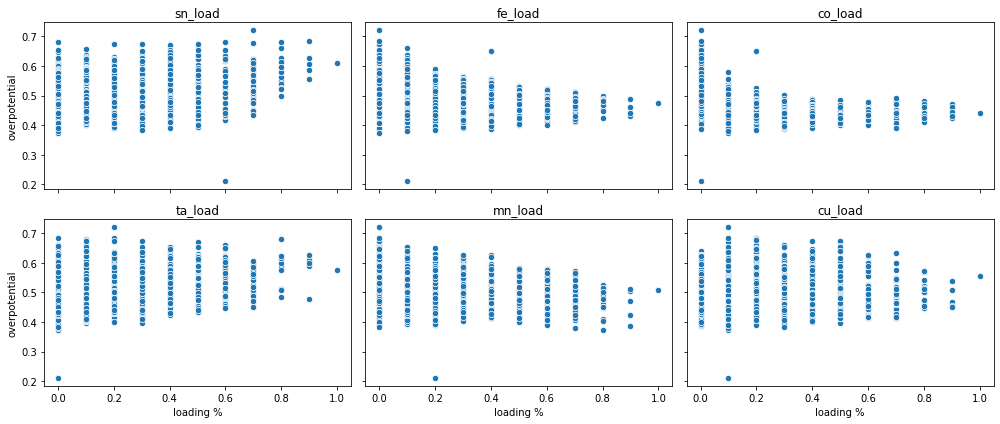

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=True, sharey=True)
axes = axes.flatten()

for ix, name in enumerate(replace):
    
    sns.scatterplot(df_olymp[name].values, df_olymp['overpotential'], ax=axes[ix],s=40)
    axes[ix].set_title(name)
    

axes[3].set_xlabel('loading %')
axes[4].set_xlabel('loading %')
axes[5].set_xlabel('loading %')

plt.tight_layout()
#plt.savefig('oer_plate_3496.png', dpi=300)

In [9]:
df_olymp.to_csv('data_olymp.csv', index=False)